# Recommendation System for MoveLens Dataset using SVD

In [ ]:
# Import libraries
import numpy as np
import pandas as pd

# To load the 'ratings' and 'movies' dataset after uploading them to Jupyter notebook

In [ ]:
# Reading ratings file

ratings = pd.read_csv('ratings.csv', usecols=['userId','movieId','rating','timestamp'])

In [ ]:
movies= pd.read_csv('CapstoneDataset.csv')

In [ ]:
df= pd.read_csv('CapstoneDataset.csv')

In [ ]:
n_users = movies.Cust_Id.unique().shape[0]

n_movies = movies.MovieName.unique().shape[0]

n_genres = movies.Genre.unique().shape[0]
print(f'Number of users = {n_users} and Number of movies = {n_movies} and Number of Genres = {n_genres}')

Number of users = 287458 and Number of movies = 241 and Number of Genres = 21


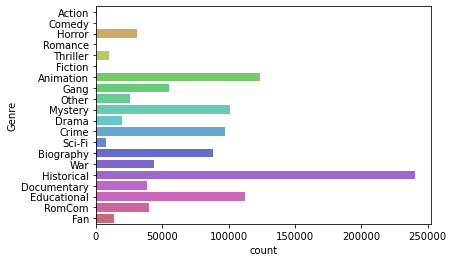

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data= movies,y='Genre',palette='hls')
plt.show()

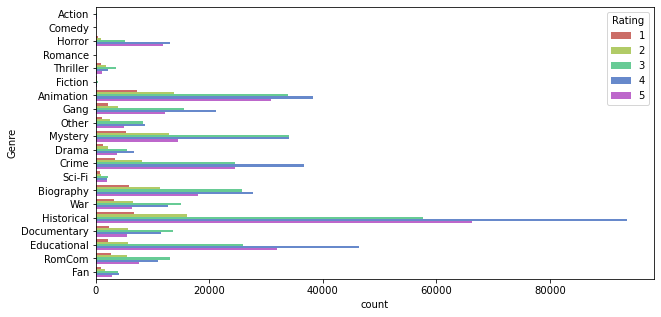

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data= movies,y='Genre',palette='hls',hue='Rating',ax=ax)
plt.show()

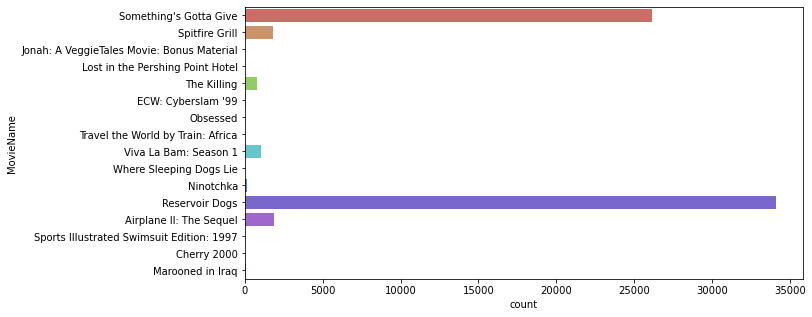

In [ ]:
pop_genre=movies[(movies['Rating']==5) & (movies['Genre']== 'Historical')]
pop_genre = pop_genre.set_index('Movie_Id')
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data= pop_genre,y='MovieName',palette='hls',ax=ax)
plt.show()

### 1.Find out the list of most popular and liked genre
#### Historical:Something's Gotta Give

In [ ]:
movies=movies.drop(['Cust_Id','Rating'],axis=1)
movies=movies.drop_duplicates()
movies=movies.rename(columns={'Movie_Id':'movieId','Genre':'genres','MovieName':'title'})

In [ ]:
movies.head()

,movieId,genres,title
0,1,Action,Dinosaur Planet
547,2,Comedy,Isle of Man TT 2004 Review
692,3,Horror,Character
2704,4,Romance,Paula Abdul's Get Up & Dance
2846,5,Thriller,The Rise and Fall of ECW


In [ ]:
# Print first five rows of ratings datset

ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


# To find the unique number of users and movies in the 'ratings' dataset

In [ ]:

n_users = ratings.userId.unique().shape[0]

n_movies = ratings.movieId.unique().shape[0]

print(f'Number of users = {n_users} and Number of movies = {n_movies}')

Number of users = 7120 and Number of movies = 14026


# To create a rating matrix for the 'ratings' dataset

In [ ]:
Ratings = ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
Ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,129350,129354,129428,129707,130052,130073,130219,130462,130490,130642
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# To install the scikit-surprise library for implementing SVD

### Run the following command in the Anaconda Prompt to install surprise package

In [ ]:
#conda install -c conda-forge scikit-surprise

In [ ]:
# Import libraries from Surprise package
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm.
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8443  0.8442  0.8462  0.8449  0.0009  
MAE (testset)     0.6469  0.6468  0.6478  0.6472  0.0004  
Fit time          92.12   90.41   91.92   91.48   0.77    
Test time         7.16    5.90    6.67    6.57    0.52    


{'test_rmse': array([0.84430594, 0.84418071, 0.84620765]),
 'test_mae': array([0.64694449, 0.64679854, 0.64778425]),
 'fit_time': (92.12171196937561, 90.40526747703552, 91.91696619987488),
 'test_time': (7.1616997718811035, 5.896416187286377, 6.66668176651001)}

In [ ]:
# Print the head of ratings dataset
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


# Train an SVD to predict ratings for user with userId = 5

In [ ]:
# Create a shallow copy for the movies dataset
user_5 = movies.copy()

#Reset the index for user_5 dataset
user_5 = user_5.reset_index()



# getting full dataset
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user1
user_5['Estimate_Score'] = user_5['movieId'].apply(lambda x: svd.predict(5, x).est)

#Drop extra columns from the user1 data frame
user_5 = user_5.drop(['movieId','index'], axis = 1)

# Sort predicted ratings for user1 in descending order
user_5 = user_5.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_5.head(10))

          genres                                              title  \
109         Gang                                            Scandal   
33           Fan  Ashtanga Yoga: Beginner's Practice with Nicki ...   
149       RomCom                                           Firetrap   
10      Thriller                     Full Frame: Documentary Shorts   
49           War                               A Yank in the R.A.F.   
0         Action                                    Dinosaur Planet   
61        Sci-Fi              Ken Burns' America: Empire of the Air   
115       Sci-Fi                                           Bear Cub   
213       Sci-Fi                   Read-Along: Beauty and the Beast   
120  Educational                           Beyonce: Live at Wembley   

     Estimate_Score  
109        4.954649  
33         4.875730  
149        4.821191  
10         4.788496  
49         4.785351  
0          4.757366  
61         4.658937  
115        4.575326  
213        4.433606 

In [ ]:
print(user_5.nunique())

genres             20
title             241
Estimate_Score    237
dtype: int64


In [ ]:
# Sort predicted ratings for user1 in descending order
user_5 = user_5.sort_values(['genres','Estimate_Score'], ascending=False)

#Print top 10 recommendations
print(user_5.head(10))

    genres                         title  Estimate_Score
49     War          A Yank in the R.A.F.        4.785351
28     War                       Boycott        4.030307
187    War                    Dead Birds        4.025304
90     War        WWE: Royal Rumble 2005        3.896958
229    War  Unsolved Mysteries: Psychics        3.855026
42     War                Silent Service        3.776966
77     War            Jingle All the Way        3.714311
117    War    Rambo: First Blood Part II        3.557983
201    War        Ruby's Bucket of Blood        3.455350
63     War               Outside the Law        3.416294


In [ ]:
# Create a shallow copy for the movies dataset
user_5_genre = movies.copy()

#Reset the index for user_5 dataset
user_5_genre = user_5_genre.reset_index()



# getting full dataset
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user1
user_5_genre['Estimate_Score'] = user_5_genre['genres'].apply(lambda x: svd.predict(5, x).est)

#Drop extra columns from the user1 data frame
user_5_genre = user_5_genre.drop(['movieId','index'], axis = 1)

# Sort predicted ratings for user1 in descending order
user_5_genre = user_5_genre.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_5_genre.head(10))

         genres                           title  Estimate_Score
0        Action                 Dinosaur Planet        3.926029
121      RomCom               Cube 2: Hypercube        3.926029
153       Other              Demon Warrior Koji        3.926029
154     Mystery  The Strongest Man in the World        3.926029
155       Drama              Husbands and Wives        3.926029
156       Crime    Laird: White Knuckle Extreme        3.926029
157      Sci-Fi                 A Killer Within        3.926029
158   Biography            Gentlemen of Fortune        3.926029
159         War                     Gormenghast        3.926029
160  Historical                       Ninotchka        3.926029


### 3.
Find what Genre Movies have received the best and
worst ratings based on User Rating.

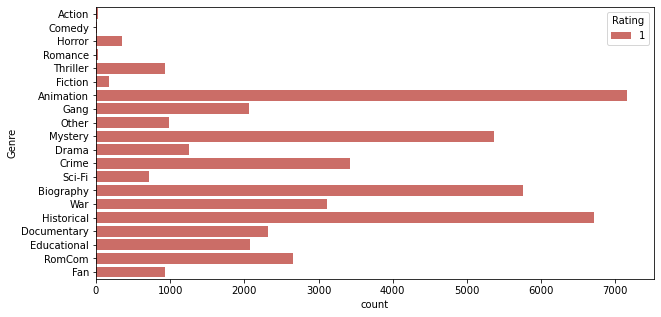

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# setting the dimensions of the plot
worst = df[(df['Rating'] <= 1)]
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data= worst,y='Genre',palette='hls',hue='Rating',ax=ax)
plt.show()

In [ ]:
worst=worst[worst['Genre']== 'Comedy']['MovieName']
worst.unique()

array(['Isle of Man TT 2004 Review'], dtype=object)

## worst :Genre: Comedy, Movie:Isle of Man TT 2004 Review

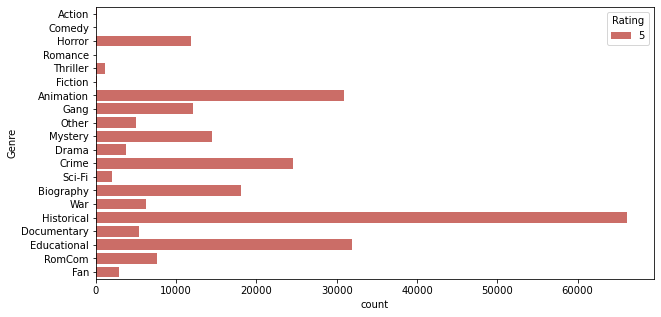

In [ ]:
best = df[(df['Rating'] == 5)]
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data= best,y='Genre',palette='hls',hue='Rating',ax=ax)
plt.show()

In [ ]:
best=best[best['Genre'] == 'Historical']['MovieName']
best.unique()

array(["Something's Gotta Give", 'Spitfire Grill',
       'Jonah: A VeggieTales Movie: Bonus Material',
       'Lost in the Pershing Point Hotel', 'The Killing',
       "ECW: Cyberslam '99", 'Obsessed',
       'Travel the World by Train: Africa', 'Viva La Bam: Season 1',
       'Where Sleeping Dogs Lie', 'Ninotchka', 'Reservoir Dogs',
       'Airplane II: The Sequel',
       'Sports Illustrated Swimsuit Edition: 1997', 'Cherry 2000',
       'Marooned in Iraq'], dtype=object)

### Best:Genre: 'Historical', Moviename: "Something's Gotta Give"